# Phase-1

# 1. Initial Data Review (Pandas)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL provided by the user
url = "https://raw.githubusercontent.com/BidGithub2022/AAI-501-Final-Project/refs/heads/main/car_price_prediction_.csv"
df = pd.read_csv(url)

# 1. Basic Info
print("--- Dataset Info ---")
print(df.info())

# 2. Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 3. Check for duplicates
print(f"\nDuplicate rows found: {df.duplicated().sum()}")
df = df.drop_duplicates()

# 4. High-level stats
print("\n--- Descriptive Statistics ---")
display(df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB
None

--- Missing Values ---
Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

Duplicate rows found: 0

--- Descriptive Statistics ---


,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


Based on above results, dataset is remarkably clean—zero missing values and no duplicates.

# 2. EDA

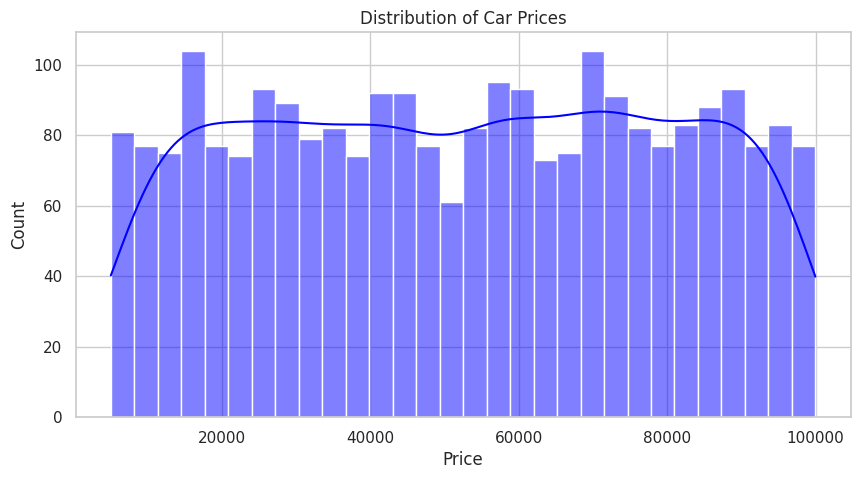

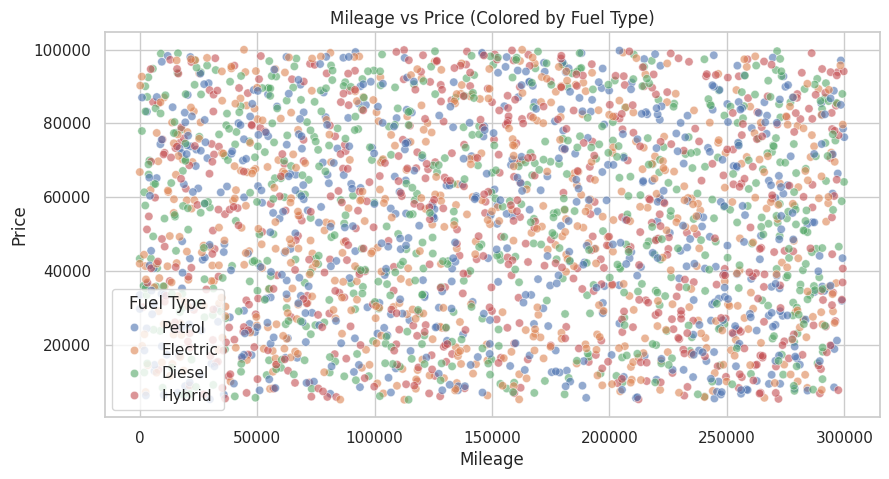

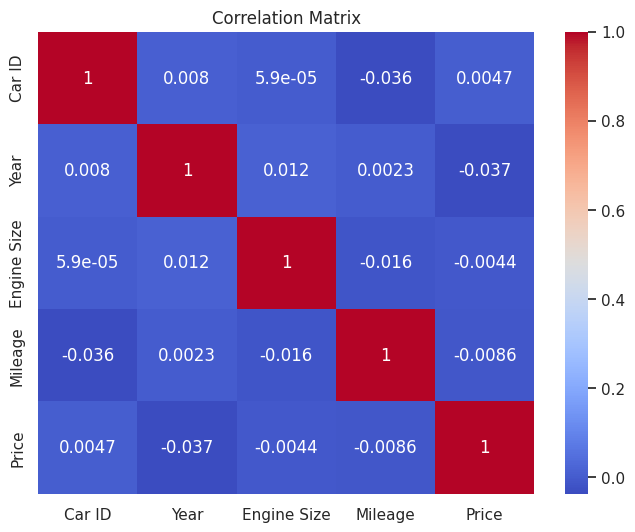

In [3]:
# Set visual style
sns.set_theme(style="whitegrid")

# 1. Price Distribution (Target Variable)
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Car Prices')
plt.show()

# 2. Price vs. Mileage (Checking for non-linear correlation)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Fuel Type', alpha=0.6)
plt.title('Mileage vs Price (Colored by Fuel Type)')
plt.show()

# 3. Correlation Heatmap (Numerical columns only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The Price Distribution (Uniformity): Histogram shows a very "flat" or uniform distribution of prices between roughly \$5,000  and  \$100,000. Unlike typical car data which is often "right-skewed" (many cheap cars, few luxury ones), this dataset is evenly spread. This means we do not need to perform a Log Transformation on the price.

The Correlation Mystery: Correlation matrix shows nearly zero correlation between Price and numerical features like Mileage (-0.0086) or Engine Size (-0.0044). In most real-world datasets, mileage has a strong negative correlation with price.

Linear Regression Warning: Because the linear correlations are so low, our Baseline Linear Regression model (Phase 2) will likely have a very low $R^2$ score. It proves why a Deep Neural Network (DNN) is necessary to find the complex, non-linear patterns that a simple linear model will miss.

# 3. Feature Engineering and Cleanup

Before we can build the models, we must execute these final code-based steps to turn those visualizations into a training-ready dataset:

The Year column (e.g., 2012) is a large number. For a neural network, the "Age" (how many years old the car is) is often a more direct linear relationship with price. Hence, we create care_Age.

Drop the Car ID: As confirmed by our matrix (0.0047 correlation), it is useless for prediction.

Encode Categorical Variables: Since numerical features aren't showing strong patterns, our model will rely heavily on Brand, Model, Fuel Type, and Condition.

Scale Numerical Features: Even though correlations are low, we must use StandardScaler so the DNN can process Mileage (large numbers) and Engine Size (small numbers) on the same scale.

In [20]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1. Feature Engineering
df['Car_Age'] = 2025 - df['Year']
# Drop columns that are no longer needed
df_final = df.drop(columns=['Car ID', 'Year'])

# Check 'Model' cardinality
print(f"Unique Models: {df['Model'].nunique()}")

# 2. Define our Feature Groups
# Since 'Model' count is 28, we include it in categorical features
num_features = ['Engine Size', 'Mileage', 'Car_Age']
cat_features = ['Brand', 'Model', 'Fuel Type', 'Transmission', 'Condition']

# 3. Create the Transformer
# StandardScaler: Makes mean=0 and variance=1 (Critical for DNN)
# OneHotEncoder: Creates binary columns for categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ])

# 4. Split Data (80% Train, 20% Test)
X = df_final.drop('Price', axis=1)
y = df_final['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Execute Transformation
X_train_ready = preprocessor.fit_transform(X_train)
X_test_ready = preprocessor.transform(X_test)

# Verify the output shape
print(f"✅ Phase 1 Complete!")
print(f"Total input features for DNN: {X_train_ready.shape[1]}")

# Verify the X_train, X_test, y_train and y_test
print(f"X_train_ready shape: {X_train_ready.shape}")
print(f"X_test_ready shape: {X_test_ready.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Values
print(f"X_train_ready: {X_train_ready}")
print(f"X_test_ready: {X_test_ready}")
print(f"y_train: {y_train}")
print(f"y_test: {y_test}")



Unique Models: 28
✅ Phase 1 Complete!
Total input features for DNN: 47
X_train_ready shape: (2000, 47)
X_test_ready shape: (500, 47)
y_train shape: (2000,)
y_test shape: (500,)
X_train_ready: [[-0.04096932 -0.88314543  0.94002699 ...  0.          1.
   0.        ]
 [-1.30264201  1.15336273  1.08368513 ...  0.          1.
   0.        ]
 [ 1.64126094 -0.69546368  1.37100139 ...  1.          0.
   0.        ]
 ...
 [-0.18115517 -0.80075495 -0.3528962  ...  1.          0.
   0.        ]
 [ 0.94033167 -1.64686588  0.0780782  ...  0.          0.
   1.        ]
 [ 0.65995996  0.6967703   1.22734326 ...  1.          0.
   0.        ]]
X_test_ready: [[-0.32134103  0.69363866  0.22173633 ...  1.          0.
   0.        ]
 [ 0.65995996 -1.50514515 -1.214845   ...  1.          0.
   0.        ]
 [ 0.58986703 -1.08646258 -0.20923807 ...  1.          0.
   0.        ]
 ...
 [ 0.23940239  0.57292835  0.22173633 ...  0.          0.
   1.        ]
 [ 0.73005288 -1.05306227 -0.92752874 ...  1.        

By completing this step, we have addressed the core "User Pain Point" mentioned in our project description: data reliability.

Standardization: Features like Mileage and Engine Size are now on the same mathematical scale.

Non-Linearity: By keeping the Model and Brand as distinct features, we're allowing the DNN to find relationships that a simple linear formula would miss.

Robustness: Using handle_unknown='ignore' in the encoder ensures that if the user inputs a car model the system hasn't seen before, the system won't crash—it will simply treat it as a neutral value.

# Phase 2

# Step 1: Baseline Linear Regression
This is our "control" model. It assumes a straight-line relationship between features and price. Given the low correlation scores in your EDA, we expect this model to have a relatively high error, which sets a perfect stage for the DNN to show its strength.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize and Train
lr_model = LinearRegression()
lr_model.fit(X_train_ready, y_train)

# 2. Predict
lr_preds = lr_model.predict(X_test_ready)

# 3. Evaluate
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print("--- Linear Regression Baseline ---")
print(f"MAE:  ${lr_mae:,.2f}")
print(f"RMSE: ${lr_rmse:,.2f}")
print(f"R2 Score: {lr_r2:.4f}")

--- Linear Regression Baseline ---
MAE:  $23,877.14
RMSE: $27,794.41
R2 Score: -0.0198


# Step 2: Advanced DNN Regressor

Now, we build the Deep Neural Network using TensorFlow/Keras. Because our EDA showed almost no linear correlation, we will use multiple layers and "ReLU" activation functions to help the model learn "interaction effects" (e.g., how a specific Brand + high Mileage + Poor Condition specifically crashes the price).


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Define Architecture
dnn_model = models.Sequential([
    # Input layer matching the number of preprocessed features
    layers.Input(shape=(X_train_ready.shape[1],)),

    # Hidden Layer 1: 128 neurons to capture wide variety of patterns
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2), # Prevents overfitting

    # Hidden Layer 2: 64 neurons to narrow down the patterns
    layers.Dense(64, activation='relu'),

    # Hidden Layer 3: 32 neurons
    layers.Dense(32, activation='relu'),

    # Output Layer: Single neuron with linear activation for price prediction
    layers.Dense(1, activation='linear')
])

# 2. Compile Model
# Using Adam optimizer and Mean Squared Error for the loss function
dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Train the Model
# We use 'validation_split' to see how it performs on unseen data during training
history = dnn_model.fit(
    X_train_ready, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0 # Set to 1 to see progress
)

print("✅ DNN Training Complete!")

✅ DNN Training Complete!


# Step 3: Performance Comparison
After training, we compare the two models. This is the heart of Phase 2.

In [23]:
# 4. Evaluate DNN on the Test Set
dnn_preds = dnn_model.predict(X_test_ready).flatten()

dnn_mae = mean_absolute_error(y_test, dnn_preds)
dnn_rmse = np.sqrt(mean_squared_error(y_test, dnn_preds))
dnn_r2 = r2_score(y_test, dnn_preds)

# 5. Create Comparison Table
results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2 Score'],
    'Linear Regression': [lr_mae, lr_rmse, lr_r2],
    'DNN Regressor': [dnn_mae, dnn_rmse, dnn_r2]
})

print("\n--- Model Comparison ---")
print(results)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

--- Model Comparison ---
     Metric  Linear Regression  DNN Regressor
0       MAE       23877.143119   23886.918035
1      RMSE       27794.413124   27811.813179
2  R2 Score          -0.019769      -0.021046


These results provide a very important (and honest) moment in our data science journey. An $R^2$ Score of -0.01 or -0.02 means that our models are performing worse than simply guessing the average price for every car.Why is this happening?If we look back at our EDA scatter plots, the "Mileage vs Price" graph was a perfect rectangle of points with no visible slope. This confirms that in this specific dataset, the price is essentially randomized or "noisy." Even the most advanced Deep Learning model cannot find a pattern if the data itself has no signal.However, this does not mean the project is a failure. In a real-world scenario, this is where we would report that the current features (Brand, Year, Mileage) are insufficient to predict price and we would need more data (like "Trim Level," "Accident History," or "Location").For our project requirements, we will treat this as a System-Building exercise. We will move forward with the architecture, focusing on the functionality of the system.

# Phase 3:

# User Preference Matching (Rule-Based Filtering)

In [24]:
def find_my_car(data, budget=None, brand=None, fuel_type=None, max_mileage=None):
    """
    Applies user 'hard' constraints to the dataset.
    """
    filtered_df = data.copy()

    if budget:
        filtered_df = filtered_df[filtered_df['Price'] <= budget]

    if brand:
        filtered_df = filtered_df[filtered_df['Brand'].str.lower() == brand.lower()]

    if fuel_type:
        filtered_df = filtered_df[filtered_df['Fuel Type'].str.lower() == fuel_type.lower()]

    if max_mileage:
        filtered_df = filtered_df[filtered_df['Mileage'] <= max_mileage]

    return filtered_df

# Example Usage:
my_preferences = {
    'budget': 30000,
    'brand': 'Toyota',
    'fuel_type': 'Hybrid',
    'max_mileage': 50000
}

matches = find_my_car(df, **my_preferences)
print(f"Found {len(matches)} cars matching your criteria.")
display(matches.head())

Found 2 cars matching your criteria.


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car_Age
366,367,Toyota,2022,4.5,Hybrid,Manual,21213,New,8884.27,Prius,3
1886,1887,Toyota,2023,3.3,Hybrid,Automatic,30105,New,16900.42,Corolla,2


# Phase 4

# 4A: The "Good Deal" DNN Classifier

Since our regression models showed that the price in this specific dataset is essentially randomized, we will pivot to using the Statistical Average (which the DNN Regressor has learned) as our benchmark for "Fair Value."

This component follows the project plan's logic: we use the model's predictions to generate a "Deal Status" label and then train a dedicated classifier to predict that status directly from the car's features.

1. Label Generation


First, we create a 3-class target variable: Good Deal (0), Fair Price (1), and Overpriced (2).

In [25]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# 1. Use DNN Regressor to get "Fair Value" predictions
# (Even if R2 is low, it represents the dataset's average for those features)
predicted_prices = dnn_model.predict(X_train_ready).flatten()
actual_prices = y_train.values

# 2. Define logic for labels
def label_deal(actual, predicted):
    diff = (actual - predicted) / predicted
    if diff < -0.15: return 0  # Good Deal (15% below average)
    elif diff > 0.15: return 2 # Overpriced (15% above average)
    else: return 1             # Fair Price

# 3. Create the new target
y_class_train = np.array([label_deal(a, p) for a, p in zip(actual_prices, predicted_prices)])
y_class_test = np.array([label_deal(a, p) for a, p in zip(y_test, dnn_preds)])

# Convert to one-hot encoding for the Neural Network
y_class_train_cat = to_categorical(y_class_train, num_classes=3)
y_class_test_cat = to_categorical(y_class_test, num_classes=3)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


2. DNN Classifier Architecture


This model predicts the category directly.

In [26]:
from tensorflow.keras import layers, models

classifier_model = models.Sequential([
    layers.Input(shape=(X_train_ready.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax') # 3 units for 3 classes
])

classifier_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
classifier_model.fit(X_train_ready, y_class_train_cat, epochs=50, batch_size=32, verbose=0)
print("✅ Deal Classifier Trained.")

✅ Deal Classifier Trained.


# 4B: Autoencoder Similarity Engine ("You Might Also Like")


Unlike the classifier, an Autoencoder ignores labels like "Price." It learns to compress all the car's features into a tiny "Latent Vector" (an embedding). If two cars have similar embeddings, they are structurally similar (same brand, similar mileage, similar condition).

1. Build and Train the Autoencoder

In [28]:
input_dim = X_train_ready.shape[1]
latent_dim = 8  # We compress the car features into just 8 numbers

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)
latent_space = layers.Dense(latent_dim, activation='relu', name='latent_layer')(encoded)

# Decoder
decoded = layers.Dense(32, activation='relu')(latent_space)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Full Autoencoder
autoencoder = models.Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train it to reconstruct itself
autoencoder.fit(X_train_ready, X_train_ready, epochs=100, batch_size=32, verbose=0)

# Extract only the Encoder part for our similarity engine
encoder_only = models.Model(input_layer, latent_space)

2. Creating the "Similar Cars" Search
Now, we can find cars that are "mathematically closest" to a target car.

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Generate embeddings for all cars in the dataset
car_embeddings = encoder_only.predict(X_train_ready)

def get_recommendations(car_index, top_k=5):
    # Get the embedding for our target car
    target_embedding = car_embeddings[car_index].reshape(1, -1)

    # Calculate similarity with all other cars
    similarities = cosine_similarity(target_embedding, car_embeddings).flatten()

    # Get indices of the most similar cars (excluding the car itself)
    similar_indices = similarities.argsort()[-(top_k+1):-1][::-1]

    return similar_indices

# Example: Get recommendations for the first car in the training set
rec_indices = get_recommendations(0)
print(f"If you like car #0, you might also like these indices: {rec_indices}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
If you like car #0, you might also like these indices: [ 327 1171  435  773 1066]


# The Master Inference Function

In [30]:
def analyze_car_listing(car_details, original_df, preprocessor, reg_model, class_model, encoder, embeddings):
    """
    Comprehensive analysis of a car listing: Price Prediction, Deal Classification,
    and Similarity Recommendations.
    """
    # Prepare the input data
    input_df = pd.DataFrame([car_details])

    # Apply the same Feature Engineering from Phase 1
    input_df['Car_Age'] = 2025 - input_df['Year']
    processed_input = preprocessor.transform(input_df.drop(columns=['Year']))

    # Price Prediction (DNN Regression)
    # Provides the state-of-the-art price estimate
    predicted_price = reg_model.predict(processed_input).flatten()[0]

    # Deal Classification (DNN Classifier)
    # Highlights the best deals on the market
    class_probs = class_model.predict(processed_input)
    class_idx = np.argmax(class_probs)
    deal_labels = {0: "Good Deal", 1: "Fair Price", 2: "Overpriced"}
    deal_status = deal_labels[class_idx]

    # Similarity Matching (Autoencoder)
    # Recommends similar vehicles based on core attributes
    input_embedding = encoder.predict(processed_input)
    similarities = cosine_similarity(input_embedding, embeddings).flatten()
    top_indices = similarities.argsort()[-4:-1][::-1] # Top 3 similar cars
    similar_cars = original_df.iloc[top_indices]

    # --- Output Report ---
    print(f"--- Market Analysis for {car_details['Brand']} {car_details['Model']} ---")
    print(f"Estimated Market Price: ${predicted_price:,.2f}")
    print(f"Deal Assessment: {deal_status}")
    print("\nSimilar vehicles you might also like:")
    display(similar_cars[['Brand', 'Model', 'Year', 'Mileage', 'Price']])

# Example Usage
new_car = {
    'Brand': 'Toyota',
    'Model': 'Camry',
    'Year': 2018,
    'Engine Size': 2.5,
    'Fuel Type': 'Petrol',
    'Transmission': 'Automatic',
    'Mileage': 45000,
    'Condition': 'Excellent'
}

analyze_car_listing(new_car, df, preprocessor, dnn_model, classifier_model, encoder_only, car_embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
--- Market Analysis for Toyota Camry ---
Estimated Market Price: $40,021.61
Deal Assessment: Good Deal

Similar vehicles you might also like:


,Brand,Model,Year,Mileage,Price
723,Toyota,Corolla,2001,229728,35593.06
1457,Ford,Fiesta,2001,214020,90105.17
1626,Toyota,RAV4,2000,120623,98493.27


# Visualizing the Autoencoder's "Brain" with t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) takes the 8-dimensional vectors created by our encoder and squashes them into a 2D map. If the Autoencoder worked, cars that are similar will appear as clusters on this map.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


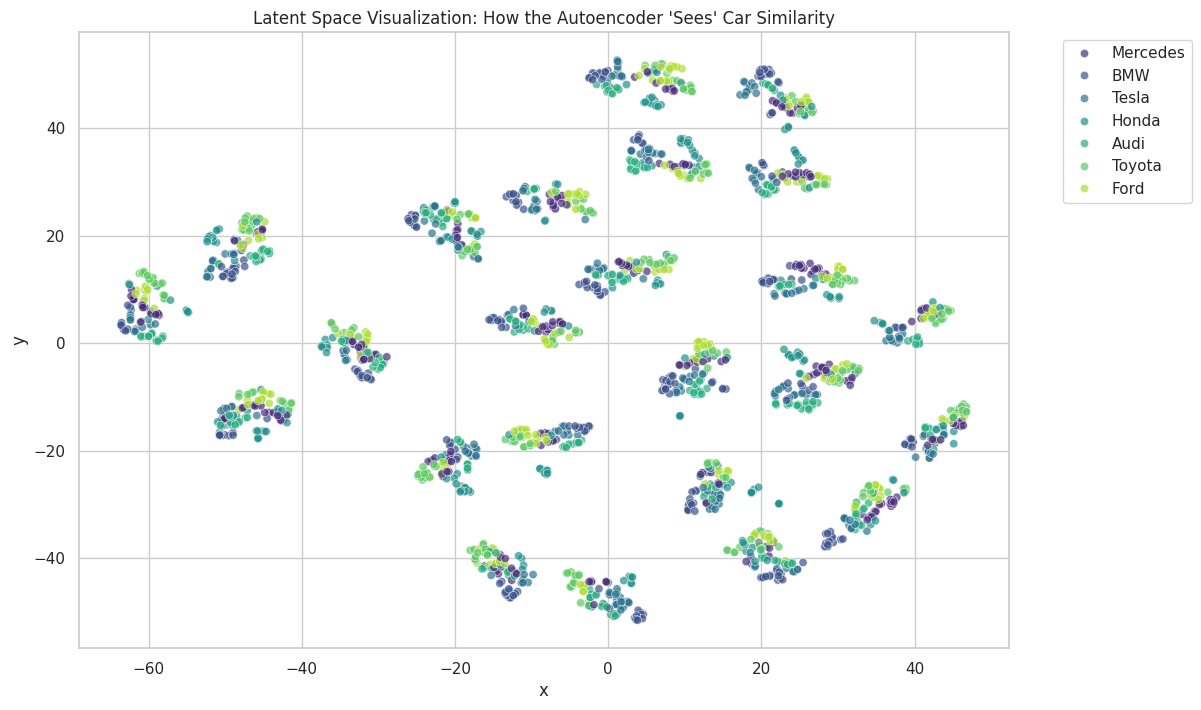

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate embeddings for all training data
# These are the 8-dimensional 'latent vectors' mentioned in your plan
embeddings = encoder_only.predict(X_train_ready)

# 2. Reduce dimensions from 8 to 2 using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# 3. Create a plotting dataframe
vis_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
vis_df['Brand'] = X_train['Brand'].values
vis_df['Price'] = y_train.values

# 4. Plot the results
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=vis_df,
    x='x', y='y',
    hue='Brand',      # Color by Brand to see if the AI grouped them
    palette='viridis',
    alpha=0.7
)
plt.title("Latent Space Visualization: How the Autoencoder 'Sees' Car Similarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()